Files already downloaded and verified
Files already downloaded and verified
Using downloaded and verified file: ./data/SVHN/train_32x32.mat
Using downloaded and verified file: ./data/SVHN/test_32x32.mat
7383.0


(0.0, 7383.0)

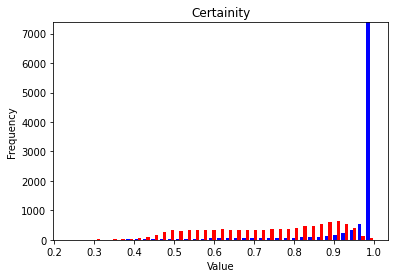

In [15]:
import torch
from utils.datasets import all_datasets
import matplotlib.pyplot as plt 
import numpy as np

from utils.resnet_duq import ResNet_DUQ


ds3 = all_datasets["CIFAR10"]()
input_size, num_classes, _ , test_dataset_CIFAR = ds3

model_CIFAR = ResNet_DUQ(input_size, num_classes, 512 ,512 ,0.1 ,0.999)


ds4 = all_datasets["SVHN"]()
_,_,_, test_dataset_SVHN = ds4

model_CIFAR.load_state_dict(torch.load("content/DUQ_CIFAR_75.pt"))
model_CIFAR.eval()

kernel_distace_CIFAR = np.zeros((int(len(test_dataset_CIFAR)/1),1))

for i in range(int(len(test_dataset_CIFAR)/1)):
  kernel_distace_CIFAR[i] = model_CIFAR(test_dataset_CIFAR[i][0].reshape(1,3,32,32))[1].max(1)[0].item()


kernel_distace_SVHN = np.zeros((int(len(test_dataset_SVHN)/2.6),1))

for i in range(int(len(test_dataset_SVHN)/2.6)):
  kernel_distace_SVHN[i] = model_CIFAR(test_dataset_SVHN[i][0].reshape(1,3,32,32))[1].max(1)[0].item()
  

n, bins, patches = plt.hist(x=[kernel_distace_CIFAR,kernel_distace_SVHN], bins='auto', color=['#0000FF','#FF0000'],label=['CIFAR','SVHN']
                           )

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Certainity')
maxfreq = n.max()
print(maxfreq)

plt.ylim(0,maxfreq)